# Comparaison du calcul de l'ETP journalière à la donnée correspondante

## Définition des paramètres

In [1]:
# Définition de la station de référence
REF_STATION_NAME = # "Mon site de référence"

# Plus proches voisins retenus
NN_NOMBRE = # 1

# Période des données
DATE_DEB_PERIODE = # '2022-01-01T00:00:00Z'
DATE_FIN_PERIODE = # '2024-12-31T00:00:00Z'

## Lecture des données météorologiques pour la station de référence

In [2]:
import meteofrance

# Météo-France API
METEOFRANCE_API = 'DPClim'

# Initialisation d'un client pour configurer l'accès aux données Météo-France même si l'API n'est pas utilisée
client = meteofrance.Client(METEOFRANCE_API)

In [3]:
import pandas as pd

# Fréquence des données climatiques
METEOFRANCE_FREQUENCE_ARR = ['quotidienne', 'quotidienne_estimee']

# Lecture des données de la station de référence pour les différents choix des plus proches voisins
df_meteo_ref_dict = {}
for param in METEOFRANCE_FREQUENCE_ARR:
    filepath_donnee_ref = meteofrance.get_filepath_donnee_periode(
        client, REF_STATION_NAME, nn_nombre=NN_NOMBRE,
        date_deb_periode=DATE_DEB_PERIODE, date_fin_periode=DATE_FIN_PERIODE,
        frequence=param, ref=True)

    df_meteo_ref = pd.read_csv(
        filepath_donnee_ref, parse_dates=[client.time_label],
        index_col=client.time_label)

    df_meteo_ref = meteofrance.renommer_variables(
        client, df_meteo_ref, param.split('_')[0])

    df_meteo_ref_dict[param] = df_meteo_ref.stack(future_stack=True)

df_meteo_ref_comp = pd.DataFrame(df_meteo_ref_dict).stack(
    future_stack=True).unstack(0).transpose()

df_meteo_ref_comp

etp                     humidite_relative  \
                          quotidienne quotidienne_estimee       quotidienne   
DATE                                                                          
2022-01-01 00:00:00+00:00    1.105877            0.999094               NaN   
2022-01-02 00:00:00+00:00    1.268821            1.109826               NaN   
2022-01-03 00:00:00+00:00    0.374808            0.445573               NaN   
2022-01-04 00:00:00+00:00    0.638673            0.556847               NaN   
2022-01-05 00:00:00+00:00    0.834029            0.790548               NaN   
...                               ...                 ...               ...   
2024-12-27 00:00:00+00:00    0.209624            0.256063               NaN   
2024-12-28 00:00:00+00:00    0.113663            0.168771               NaN   
2024-12-29 00:00:00+00:00    0.004411            0.229901               NaN   
2024-12-30 00:00:00+00:00    0.065607            0.290926               NaN   
2024-12-31 00:00:00+00:00    0.245128            0.376605               NaN   

                                              precipitation  \
                          quotidienne_estimee   quotidienne   
DATE                                                          
2022-01-01 00:00:00+00:00            0.848411      0.398526   
2022-01-02 00:00:00+00:00            0.834083      0.114343   
2022-01-03 00:00:00+00:00            0.929913     23.281892   
2022-01-04 00:00:00+00:00            0.897131      2.293102   
2022-01-05 00:00:00+00:00            0.752369      0.960259   
...                                       ...           ...   
2024-12-27 00:00:00+00:00            0.939435      0.116365   
2024-12-28 00:00:00+00:00            0.963579      0.124725   
2024-12-29 00:00:00+00:00            0.958136      0.000000   
2024-12-30 00:00:00+00:00            0.936719      0.130236   
2024-12-31 00:00:00+00:00            0.947005      0.156621   

                                              rayonnement_global  \
                          quotidienne_estimee        quotidienne   
DATE                                                               
2022-01-01 00:00:00+00:00            0.208127                NaN   
2022-01-02 00:00:00+00:00            0.325982                NaN   
2022-01-03 00:00:00+00:00           20.106851                NaN   
2022-01-04 00:00:00+00:00            4.140486                NaN   
2022-01-05 00:00:00+00:00            1.846153                NaN   
...                                       ...                ...   
2024-12-27 00:00:00+00:00            0.000000                NaN   
2024-12-28 00:00:00+00:00            0.241090                NaN   
2024-12-29 00:00:00+00:00            0.000000                NaN   
2024-12-30 00:00:00+00:00            0.014467                NaN   
2024-12-31 00:00:00+00:00            0.272389                NaN   

                                              temperature_2m  \
                          quotidienne_estimee    quotidienne   
DATE                                                           
2022-01-01 00:00:00+00:00           3650000.0            NaN   
2022-01-02 00:00:00+00:00           3270000.0            NaN   
2022-01-03 00:00:00+00:00           1220000.0            NaN   
2022-01-04 00:00:00+00:00           2360000.0            NaN   
2022-01-05 00:00:00+00:00           1970000.0            NaN   
...                                       ...            ...   
2024-12-27 00:00:00+00:00           1630000.0            NaN   
2024-12-28 00:00:00+00:00            900000.0            NaN   
2024-12-29 00:00:00+00:00            870000.0            NaN   
2024-12-30 00:00:00+00:00           1350000.0            NaN   
2024-12-31 00:00:00+00:00           2520000.0            NaN   

                                              vitesse_vent_10m  \
                          quotidienne_estimee      quotidienne   
DATE                                                          

## Comparaison des séries temporelles

### Pour toute la période

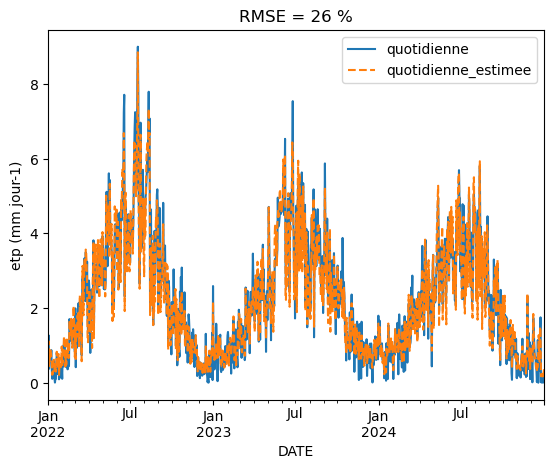

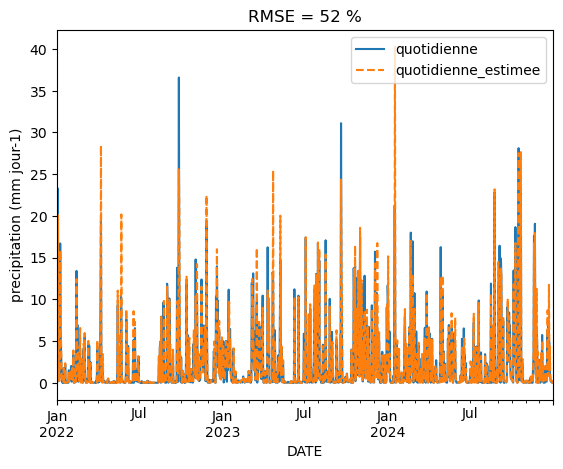

In [4]:
from sklearn.metrics import root_mean_squared_error

# Plot des séries temporelles entières
style = ['-', '--']
for variable in df_meteo_ref_comp.columns.levels[0]:
    # Identification des points valides pour les deux séries
    y_true = df_meteo_ref_comp[(variable, METEOFRANCE_FREQUENCE_ARR[0])]
    y_pred = df_meteo_ref_comp[(variable, METEOFRANCE_FREQUENCE_ARR[1])]
    valid = ~(y_true.isnull() | y_pred.isnull())
    
    if valid.any():
        # Calcul RMSE entre séries
        rmse = root_mean_squared_error(y_true[valid], y_pred[valid])
        rmse_rel = rmse / y_true.std() * 100
    
        # Plot
        title = f"RMSE = {rmse_rel:.0f} %"
        ylabel = f"{variable} ({meteofrance.UNITES[variable]})"
        df_meteo_ref_comp[variable].plot(style=style, title=title, ylabel=ylabel)

### Pour l'été

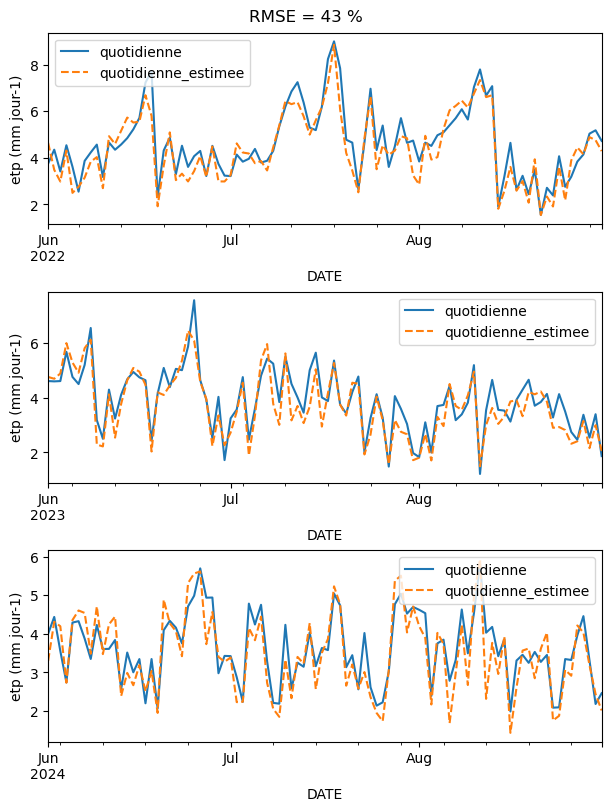

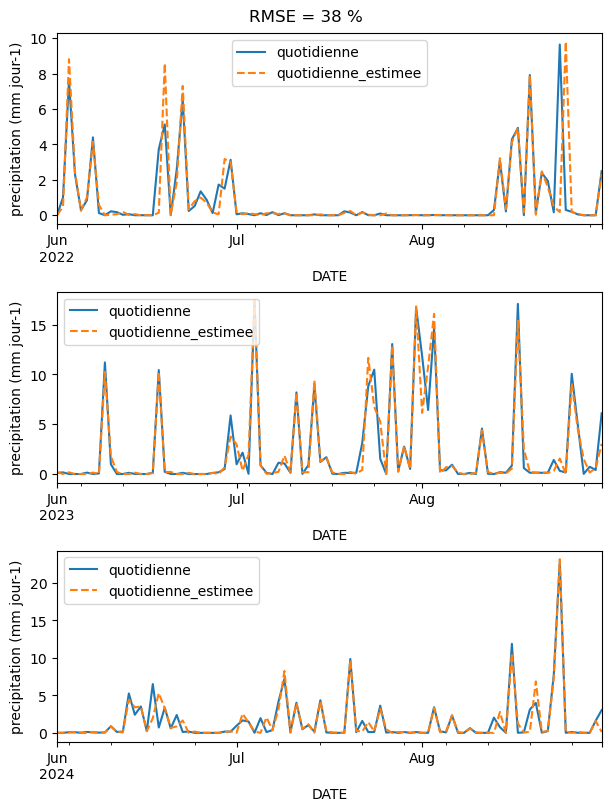

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Plot des séries temporelles pour les mois d'été uniquement
SUMMER_MONTHS = [6, 7, 8]

years = np.unique(df_meteo_ref_comp.index.year)
df_meteo_ref_comp_summer = pd.concat([df_meteo_ref_comp.loc[f"{y}-{month}"]
                                      for month in SUMMER_MONTHS
                                      for y in years], axis='index')

style = ['-', '--']
for variable in df_meteo_ref_comp.columns.levels[0]:
    # Identification des points valides pour les deux séries
    y_true = df_meteo_ref_comp_summer[(variable, METEOFRANCE_FREQUENCE_ARR[0])]
    y_pred = df_meteo_ref_comp_summer[(variable, METEOFRANCE_FREQUENCE_ARR[1])]
    valid = ~(y_true.isnull() | y_pred.isnull())
    
    if valid.any():
        # Calcul RMSE entre séries
        rmse = root_mean_squared_error(y_true[valid], y_pred[valid])
        rmse_rel = rmse / y_true.std() * 100
    
        # Plot
        fig, ax = plt.subplots(len(years), layout='constrained', figsize=[6, 8])
        ylabel = f"{variable} ({meteofrance.UNITES[variable]})"
        df_plot = df_meteo_ref_comp_summer[variable]
        for k, y in enumerate(years):
            df_plot.loc[str(y)].plot(
                ax=ax[k], style=style, ylabel=ylabel)
        fig.suptitle(f"RMSE = {rmse_rel:.0f} %")